<a href="https://colab.research.google.com/github/K-Kamonrat/DPDM/blob/master/pandas_and_data_preprocessing101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

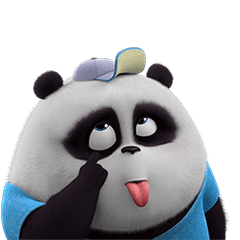

In [1]:
import pandas

In [2]:
import pandas as pd

In [3]:

from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path =  '/content/drive/My Drive/DWDM_material'

In [6]:
search_click = os.path.join(path, 'search_click.csv')
w_restaurant = os.path.join(path, 'w_restaurant.csv')

In [7]:
search_click_df = pd.read_csv(search_click)
w_restaurant_df = pd.read_csv(w_restaurant)

In [8]:
search_click_df.head()


,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [9]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [10]:
search_click_df.shape #.shape เอาไว้เช็ครูปร่างของตาราง จะแสดงค่า (dataจำนวนแถว , featureจำนวนคอลัม)

(1048575, 6)

In [11]:
w_restaurant_df.shape

(246847, 32)

In [12]:
search_click_df.shape[0]

1048575

#0.Point to data in the table

##normal index

In [13]:
search_click_df['search_id'] #ใส่ชื่อคอลัมม์เลย

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [14]:
search_click_df['search_id'][0]  #ด้านแนวตั้งใช้ชื่อตาราง ด้านแนวนอนใช้ตะเลขระบะตำแหน่งของdata

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [15]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


##.iloc
* มอง data เป็น matrix

In [16]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [17]:
search_click_df.iloc[:10,:2] #matrix sclicing

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


#Missing value

In [18]:
search_click_df.isnull() #.isnull เอาไว้เช็คว่ามี missing value รึป่าว >> True หมายว่าว่า ช่องนั้นเป็น missing value ถ้าไม่ใช่ จะขึ้นว่า False

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [19]:
search_click_df.isnull().any()  #.any คือการสรุปรวมความจริงทั้งหมดในฝั่งคอลัมม์   เอาข้อมูลในแต่ละข้อลัมล์มา or(logic) กันทั้งหมด

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [20]:
search_click_df.isnull().any().any() #เอาความจริงที่เหลืออยู่คอลัมม์เดียวมา or กันทั้งหมด จะได้รู้ความจริงทั้งตาราง

True

In [21]:
search_click_df.isnull().all() #.all คือการสรุปรวมความจริงทั้งหมดในฝั่งคอลัมม์   เอาข้อมูลในแต่ละข้อลัมล์มา and(logic) กันทั้งหมด

click_timestamp     False
search_id           False
business_id         False
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

#Handdle Missing value 1

* delete ข้อมูลนั้นไปเลย

In [22]:
search_click_df_nm =search_click_df.dropna()

In [23]:
search_click_df_nm.isnull().any().any()

False

In [24]:
print(search_click_df.shape)
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


In [25]:
print(search_click_df.shape[0]-search_click_df_nm.shape[0]) #หาว่าข้อมูลMissingที่ลบไปมีกี่ตัว

369


#Exercise1 ตรวจสอบว่ากานรลบข้อมูล missing อกจากตาราง w_restarant จะทำให้ข้อมูลลดลงกี่ %

In [26]:
w_restaurant_df_nm = w_restaurant_df.dropna()

In [27]:
w_restaurant_df_nm.isnull().any().any()

False

In [28]:
print(w_restaurant_df.shape)
print(w_restaurant_df_nm.shape)

(246847, 32)
(4, 32)


In [29]:
 print(w_restaurant_df.shape[0]-w_restaurant_df_nm.shape[0]) #จำนวนข้อมูลที่หายไป

246843


In [30]:
((w_restaurant_df.shape[0]-w_restaurant_df_nm.shape[0])/w_restaurant_df.shape[0])*100 #ของจำนวนข้อมูลที่หายไป

99.99837956304918

##Method 1.5 

* dropna หรือ ลบ เฉพาะข้อมูลที่เราต้องการ เช่น อยากรู้ราคาเฉลี่ยของร้านค้าเป็นเท่าไหร่ ก็เลือกเฉพาะคอลัมม์ที่เกี่ยวข้อง

In [31]:
w_restaurant_df_nm.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                    False
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks        False
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                False
avg_price                  False
parking                    False
credit_card_accepted       False
good_for_groups            False
good_for_kids              False
bookable                   False
best_of_wongnai            False
wifi                       False
number_of_seats            False
music_venue                False
hotel_restaurant           False
pet_friend

In [32]:
w_restaurant_df.dropna(subset=['id','name','avg_price']).shape

(4572, 32)

In [33]:
w_rest_dropped_avgprice=w_restaurant_df.dropna(subset=['id','name','avg_price'])

In [34]:
w_rest_dropped_avgprice.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
11,27,แพอาหารธาราบุรี,1,0,Kanchanaburi,71000,w4qzbb4,0,3.568245,NaN,107.0,34,3,22277,26,0,0,Thai,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
67,123,เล็กกุ้งเผา,1,0,Bangkok Metropolitan Region,10310,w4rw9mc,0,3.685552,NaN,272.0,29,7,28697,26,0,15,Thai,3.0,375.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,175,ใต้ต้นมะม่วง,1,0,Phuket,83000,w1muz5d,0,3.857143,NaN,17.0,15,2,3278,6,0,3,Thai,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
129,262,Oniku Shabushabu & Yakiniku,1,0,Surat Thani,84000,w1weuxg,0,3.633588,NaN,40.0,19,2,10349,7,0,11,Sukiyaki/Shabu,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,NaN,0.0,NaN,1.0
134,271,Cafe Cha,1,0,Bangkok Metropolitan Region,10300,w4rqrhf,0,4.094527,NaN,251.0,12,0,17775,11,0,7,Café/Coffee Shop,4.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [35]:
w_restaurant_df.dropna(subset=['id','name','avg_price'])['avg_price'].mean()

327.44728783902013

##Method 2 (Replace with reasonalable value)

### we are replacing missing value in the number of chains with 0
* number of chain คืออะไร ไปเปิดดูใน matadata == จำนวนสาขาของร้าน

In [36]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [37]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

## Method 2.1 (replace with unknown value) 
* ใส่ค่าที่คิดว่าคนไม่น่ากรอกสิ่งเหล่านี้ลงไป เพื่อไม่ให้มี missing แต่ไม่ทำให้ค่าทางสถิติของข้อมูลเปลี่ยนไป

##Method 2.2 (replace with mean)

## Method 3 (replace with mean)

In [38]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


#[PD] Select data

In [39]:
selected_list = new_table['city_name']=='Bangkok Metropolitan Region'
selected_list 

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [40]:
new_table[selected_list].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


หาราคาเฉลี่ยของร้านในจังหวัดกรุงเทพ

In [41]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1.สร้างตารางใหม่ที่เลือกมาเฉพาะใน กทม.

In [42]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table.head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN



ลบ missing

In [43]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp.head()

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0


 เลือกเฉพาะ column 'avg_price'

In [44]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

หาค่าเฉลี่ย

In [45]:
bkk_table_dp_avg_price.mean()

392.5854715094968

In [46]:
phuket_table = new_table['city_name']=='Phuket'

แก้ missing method 3 เติมค่าที่เหมาะสมตามกลุ่มของมัน

In [47]:

bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean())
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


#Ex 9 หาราคาเฉลี่ยของร้านในจังหวัดภูเก็ตและเติมแทนค่า missing ของจังหวัดภูเก็ต

In [48]:
pk_table = new_table[new_table['city_name']=='Phuket']
pk_table[['avg_price']] = pk_table[['avg_price']].fillna(new_table[new_table['city_name']=='Phuket'].dropna()['avg_price'].mean())
pk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
53,เดอะฟอร์เต้ไอซ์แลนด์,Phuket,181.481481
74,ร้านอาหารในยางปาร์ค,Phuket,181.481481
91,ใต้ต้นมะม่วง,Phuket,50.000000
96,อาหารเกาหลีชินจอง,Phuket,181.481481
190,ไชน่าอินน์,Phuket,181.481481


In [49]:
ch_table = new_table[new_table['city_name']=='Chon Buri']
ch_table[['avg_price']] = ch_table[['avg_price']].fillna(new_table[new_table['city_name']=='Chon Buri'].dropna()['avg_price'].mean())
ch_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
5,บ้านมุมสบาย,Chon Buri,283.547619
15,The Rabbit หมูกระทะนานาชาติ,Chon Buri,283.547619
42,ก๋วยเตี๋ยวเป็ด ณ.พัทยา,Chon Buri,283.547619
45,ซันเซ็ทพาร์ครีสอร์ตแอนด์สปา,Chon Buri,283.547619
68,Oldies Bar & Bistro,Chon Buri,283.547619


[PD] ต่อตารางในแนวแกน Y (เพิ่มจำนวน data) pd.concat

In [50]:
pandas.concat([bkk_table,pk_table,ch_table]).isnull().any()

name         False
city_name    False
avg_price    False
dtype: bool

#Looping(concat)

###step 1 ดึงจังหวัดทั้งหมด

In [51]:
all_cities = set(new_table['city_name'])
print(len(all_cities))
all_cities

479


{'Abu Dhabi',
 'Aichi-ken',
 'Akershus',
 'Akita-ken',
 'Al Farwaniyah Governorate',
 'Alabama',
 'Alaska',
 'Alberta',
 'Amnat Charoen',
 'Andalucía',
 'Ang Thong',
 'Aomori-ken',
 'Appenzell Ausserrhoden',
 'Appenzell Innerrhoden',
 'Aragón',
 'Argyll and Bute',
 'Arizona',
 'Attica',
 'Auckland',
 'Australia',
 'Auvergne-Rhône-Alpes',
 'Aydın',
 'Ba Ria - Vung Tau',
 'Baden-Wurttemberg',
 'Bago Region',
 'Bahia',
 'Bali',
 'Balochistan',
 'Bangkok Metropolitan Region',
 'Banteay Meanchey Province',
 'Banten',
 'Basel-Stadt',
 'Basilicata',
 'Basrah',
 'Battambang',
 'Bay Of Plenty',
 'Bayern',
 'Berlin',
 'Bern',
 'Bihar',
 'Binh Thuan',
 'Binh Thuan province',
 'Borno',
 'Bratislava',
 'Bremen',
 'Bretagne',
 'British Columbia',
 'Brussels Hoofdstedelijk Gewest',
 'Buckinghamshire',
 'Budapest',
 'Bueng Kan',
 'Buri Ram',
 'Busan',
 'Buskerud',
 'C2 MALL',
 'CALABARZON',
 'Cairo Governorate',
 'California',
 'Cambodia',
 'Canterbury',
 'Capital Governorate',
 'Capital Region',
 'Ca

###step 2 คำนวณ mean ของ column 'city_name' เพื่อเก็บไว้เติมใส่เมืองที่เป็น missing ทุกร้าน


In [52]:
all_mean = new_table.dropna(subset=['avg_price'])['avg_price'].mean()
all_mean


327.44728783902013

###สร้าง list ของตารรางของทุกๆจังหวัด

In [53]:
all_cities_list = []
for each_city in all_cities:
  temp_table = new_table[new_table['city_name']==each_city]
  temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
  all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [54]:
all_cities_list = []
for each_city in sorted(list(all_cities)): #เปลี่ยนsetเป็นlistเพื่อให้เรียงลำดับ
  temp_table = new_table[new_table['city_name']==each_city]
  temp_table[['avg_price']] = temp_table[['avg_price']].fillna(new_table[new_table['city_name']==each_city].dropna()['avg_price'].mean())
  all_cities_list.append(temp_table)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [55]:
pandas.concat(all_cities_list).fillna(all_mean) #ตอนนี้เป็นแค่ตัวโชว์เฉยๆ ไม่ใช่ตาราง

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288
...,...,...,...
246412,ครัวข้าวสวย,เขาใหญ่,327.447288
246418,ร้านอาหารดาวเดือน,เขาใหญ่,327.447288
246780,กาแฟสด,เขาใหญ่,327.447288
246791,ยู้ ลูกชิ้นปลาเยาวราช,เขาใหญ่,327.447288


In [56]:
no_missing = pandas.concat(all_cities_list).fillna(all_mean) 
no_missing.head()

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288


In [57]:
london_index_list = no_missing['city_name']=='Greater London' #เรียกมาเฉพาะ london จากตาราง no_missing
no_missing[london_index_list]

,name,city_name,avg_price
3580,Greene King,Greater London,327.447288
5402,Miyama,Greater London,327.447288
6375,Misato,Greater London,327.447288
7644,Duck And Waffle,Greater London,327.447288
8343,L'Atelier De Joel Robuchon,Greater London,327.447288
...,...,...,...
238648,CnR,Greater London,327.447288
241688,nando's,Greater London,327.447288
243077,Cakehole,Greater London,327.447288
243749,The Refinery,Greater London,327.447288


In [58]:
london_index_list = no_missing['avg_price']<15 #เช็คว่ามีร้านไหนที่ราคาอาหารเฉลี่ยต่ำกว่า 15 เราจะ assume ว่าเขาใส่หน่วยราคามาเป็นหน่วยอื่นที่ไม่ใช่บาท
no_missing[london_index_list]

,name,city_name,avg_price
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,0.0
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,0.0
204196,โภชนากร หนองมน,Chon Buri,11.0
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,4.0


#Homework 10 ทำ Binnig smooth by mean ค่า 'avg_price' ในตาราง no_missing (bin = 50)

In [59]:
no_missing

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288
...,...,...,...
246412,ครัวข้าวสวย,เขาใหญ่,327.447288
246418,ร้านอาหารดาวเดือน,เขาใหญ่,327.447288
246780,กาแฟสด,เขาใหญ่,327.447288
246791,ยู้ ลูกชิ้นปลาเยาวราช,เขาใหญ่,327.447288


In [60]:
#step 1 : sort
Nomissing_sorted = no_missing.sort_values('avg_price')
Nomissing_sorted

,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,0.0
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,0.0
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,4.0
204196,โภชนากร หนองมน,Chon Buri,11.0
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,1500.0
22942,BMC CLINIC,Bangkok Metropolitan Region,1500.0
168720,Bo.lan,Bangkok Metropolitan Region,1500.0
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,1500.0


In [61]:
#step 2 :แบ่งเป็น 50 ส่วน
Nomissing_sorted.iloc[::50]

,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
117977,นายหมงหอยทอด,Bangkok Metropolitan Region,50.0
85598,ครัวแดนใต้,Krabi,50.0
243699,หอยทอดชาวเล,Bangkok Metropolitan Region,50.0
79116,Roengjit Phuket,Phuket,50.0
...,...,...,...
119230,Bulgogi Brothers,Bangkok Metropolitan Region,750.0
179198,พรเกษมคลินิก,Chon Buri,750.0
20927,Utage,Bangkok Metropolitan Region,1500.0
202349,Atrium at The Landmark Bangkok,Bangkok Metropolitan Region,1500.0


In [62]:
2937/50

58.74

#เฉลยการบ้าน Binning

step 1 : เรียงข้อมูล

In [63]:
sorted_no_missing =  no_missing.sort_values('avg_price')
sorted_no_missing

,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,0.0
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,0.0
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,0.0
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,4.0
204196,โภชนากร หนองมน,Chon Buri,11.0
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,1500.0
22942,BMC CLINIC,Bangkok Metropolitan Region,1500.0
168720,Bo.lan,Bangkok Metropolitan Region,1500.0
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,1500.0


step 2 : binning

In [64]:
import math

In [65]:
each_bin = sorted_no_missing.shape[0]/50
print(math.ceil(each_bin))

4937


In [66]:
for i in range(50):
    sorted_no_missing.iloc[i*math.ceil(each_bin) : i*math.ceil(each_bin)+math.ceil(each_bin),:] #แบ่งbin
    this_mean = sorted_no_missing.iloc[i*math.ceil(each_bin) : i*math.ceil(each_bin)+math.ceil(each_bin),:]['avg_price'].mean() #หา  mean ของแต่ละ bin
    sorted_no_missing.iloc[i*math.ceil(each_bin) : i*math.ceil(each_bin)+math.ceil(each_bin),:] ['avg_price']=this_mean #เติมค่า mean ลงไปในแต่ละ bin
sorted_no_missing


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,name,city_name,avg_price
58579,รามคลินิกแพทย์,Bangkok Metropolitan Region,110.607177
139618,Klong Lat Mayom floating market,Bangkok Metropolitan Region,110.607177
18161,ดรีมเวิลด์,Bangkok Metropolitan Region,110.607177
167551,ทรีท็อปแอดเวนเจอร์พาร์ค กาญจนบุรี,Kanchanaburi,110.607177
204196,โภชนากร หนองมน,Chon Buri,110.607177
...,...,...,...
8130,Dine In The Dark,Bangkok Metropolitan Region,476.661359
22942,BMC CLINIC,Bangkok Metropolitan Region,476.661359
168720,Bo.lan,Bangkok Metropolitan Region,476.661359
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359


#เช็ค error

In [67]:
#เช็คว่าทำไมไม่ error

In [68]:
sorted_no_missing.iloc[246845:246850,:]

,name,city_name,avg_price
8598,หมอศรัณย์ (คลินิกศัลยกรรมนายแพทย์ศรัณย์),Bangkok Metropolitan Region,476.661359
100459,Paichaoclinic ไป๋เฉ่าสหคลินิก,Bangkok Metropolitan Region,476.661359


In [69]:
sorted_no_missing.iloc[246845:246850,:].mean()

avg_price    476.661359
dtype: float64

In [70]:
#ที่มันไม่ error ทั้งๆ ที่มี missing เพราะโปรแกรมมันตัดค่าที่ไม่มีออกเลย

#Remove Outlier (boxplot)

* step 1 : สร้าง box plot ของค่า avg price จากตาราง nomissing ในชื่อ ret

In [71]:
# import libraly pyplot มาเพื่อวาดกราฟ
from matplotlib import pyplot as plt

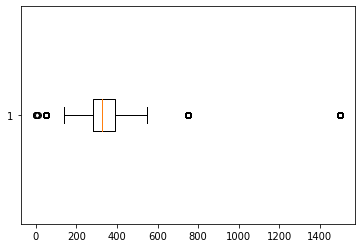

In [72]:
ret = plt.boxplot(no_missing['avg_price'],vert=False)

In [73]:
ret['boxes'][0].get_xdata() #เรียกค่าจาก boxplot ของเรามาดู

array([283.54761905, 283.54761905, 392.58547151, 392.58547151,
       283.54761905])

In [74]:
#flier => outlier ของแต่ละตัว
#wisker => ขอบเขตของ data 

In [75]:
ret['whiskers']

In [76]:
print(ret['whiskers'][0].get_xdata()) #wisker ฝั่งซ้าย
print(ret['whiskers'][1].get_xdata()) #wisker ฝั่งขวา

[283.54761905 138.15789474]
[392.58547151 549.        ]


ค่า wisker จะreturn ออกมา ฝั่งละ 2 ค่า
* เราต้องใช้ค่าต่ำสุดของฝั่งซ้าย และ มากสุดของ wisker ด้านขวา  เป็นค่าอ้างอิง
* ค่าที่อยู่นอกขอบเขตนี้ เป็น outlier ต้องลบออก

In [77]:
no_outlier_no_missing = no_missing[(no_missing['avg_price']>=ret['whiskers'][0].get_xdata()[1])] #ตัดค่าด้านซ้าย
no_outlier_no_missing = no_outlier_no_missing[(no_outlier_no_missing['avg_price']<=ret['whiskers'][1].get_xdata()[1])] #เอาอันที่ตัดค่าด้านซ้ายมาตัดค่าด้านขวาต่อ
no_outlier_no_missing

,name,city_name,avg_price
56391,Smoking Doll Nation Galleria,Abu Dhabi,327.447288
67914,PRET TO GO (Terminal 1),Abu Dhabi,327.447288
123536,Keway Mai,Abu Dhabi,327.447288
142972,La Brioche,Abu Dhabi,327.447288
223144,White Dot Table,Abu Dhabi,327.447288
...,...,...,...
246412,ครัวข้าวสวย,เขาใหญ่,327.447288
246418,ร้านอาหารดาวเดือน,เขาใหญ่,327.447288
246780,กาแฟสด,เขาใหญ่,327.447288
246791,ยู้ ลูกชิ้นปลาเยาวราช,เขาใหญ่,327.447288


In [78]:
#หาจำนวน outlier
number_of_outlier = len(no_missing)-len(no_outlier_no_missing)
number_of_outlier

3004

#Deduplication(remove duplication) , sampling (randomly selected data) vs PCA (reduce dimension sata)

* Deduplication(remove duplication) ลบตัวที่ซ้ำ =>  ไม่ต้องการข้อมูลตัวที่ซ้ำกัน
* sampling (randomly selected data) เลือกข้อมูลมาบางตัว (แนวตั้ง)
* PCA  ไม่ได้ลดจำนวน data แต่ลด feature (จะเลือกมาใช้เฉพาะ feature ที่สำคัญ)


##drop duplication

In [79]:
w_restaurant_df.shape

(246847, 32)

In [80]:
w_restaurant_df.drop_duplicates().shape #drop_duplicates() เช็คทุกคอลัมที่ซ้ำกัน (ต่างจาก drop.na ที่ ตัดเฉพาะ missing)

(246847, 32)

In [81]:
w_restaurant_df.drop_duplicates(subset=['name']).shape #เลือก subset เฉพาะคอลัมม์ที่เราสนใจ เช่น อยากรู้ว่ามีอันไหนที่ชื่อซ้ำกันบ้าง เลยใส่ subset เป็น 'name'

(203707, 32)

#Ex.11 sample 1 restaurant from each city using drop_duplicates

In [82]:
w_restaurant_df #ตารางข้อมูลทั้งหมด

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,0.0,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,0.0,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,340068,Sushi Tama,1,0,Bangkok Metropolitan Region,11130,w4rqtcb,0,3.663522,3.0,40.0,27,1,10118,18,0,21,Sushi,2.0,NaN,3.0,1.0,0.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
246843,340070,สะบายดี คาราโอเกะ,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.000000,0.0,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
246844,340074,สเต็กแม่&กาแฟลูก,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.000000,0.0,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246845,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.000000,0.0,6.0,1,2,4031,0,0,2,Café/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
w_restaurant_df.drop_duplicates(subset=['city_name']) #ห้ามให้city_name ซ้ำกัน

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,0.0,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.0,0.0,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.0,0.0,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,บ้านมุมสบาย,1,0,Chon Buri,NaN,w4rgsyz,0,5.0,0.0,2.0,0,0,930,0,0,0,Thai,3.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,1.0,0.0,0.0,0.0
6,15,Hing Fat Resteurant,1,0,New Territories,NaN,wecny4b,0,3.0,0.0,1.0,3,1,859,1,0,2,Noodles,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230650,321282,Tuong Cafe,1,0,tỉnh Kiên Giang,NaN,w3cfjsh,0,0.0,0.0,NaN,0,0,48,1,0,0,Vietnam,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239005,331078,Matahari,1,0,Nusa Tenggara Barat,NaN,qw6x8ub,0,3.0,0.0,NaN,1,0,120,1,0,0,International,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241165,333510,Seed cafe,1,0,Louisiana,10900,9vrkknk,0,0.0,0.0,NaN,0,0,99,0,0,0,Thai,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243902,336548,北門口肉圓,1,0,Changhua County,NaN,wsm9nbp,0,3.0,0.0,1.0,1,0,129,1,0,0,Fastfood,1.0,NaN,0.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN


## sampling
* ในสมัยใหม่ จะใช้ sampling ไม่ได้ใช้เพื่อลดข้อมูลจากการเอาแค่ตัวแทนมาใช้ แต่จะใช้ sampling เพื่อมาเพิ่มข้อมูลแทน เช่น ถ้าเรามีข้อมูล 2 กลุ่ม มีกลุ่มนึงที่จำนวนข้อมูลน้อยกว่า เราจะทำการ sampling หยิบข้อมูลในชุดนั้นตัวเดิมมาเพิ่ม เพื่อให้มีข้อมูลมากขึ้นจนเท่ากับอีกชุดนึง 

* n คือ จำนวนข้อมูลที่เราจะสุ่มมา
* frac คือ สัดส่วนของ data เช่น เราต้องการข้อมูล 20% ของจำนวนdata เราก็จะ input frac = 0.2

In [84]:
w_restaurant_df.sample(10)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
205132,286064,ส้มตำอินเตอร์,1,0,Chiang Rai,57100,w5x409y,0,3.770642,0.0,29.0,7,4,4205,4,0,3,North East,1.0,NaN,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162567,232718,pink pumpkin,1,1,Chiang Mai,50000,w5q6v8k,0,3.000000,0.0,2.0,1,0,436,1,0,0,Ice Cream,1.0,NaN,3.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192931,271021,โคซีเทล เชียงใหม่,3,0,Chiang Mai,50200,w5q6ukz,0,0.000000,0.0,3.0,0,0,291,0,0,0,Hotel/Resort,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
164015,234552,ปายรักสุดขอบฟ้า,1,0,Thailand,50150,w5qn069,0,0.000000,0.0,NaN,0,0,102,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170750,243206,ไอติมผัด Ice Manias,1,0,Loei,42000,w7076zu,0,5.000000,0.0,2.0,1,0,2313,0,0,1,Ice Cream,1.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238863,330926,ศิริชัยไก่ย่าง,1,0,Bangkok Metropolitan Region,10900,w4rw88x,0,2.723577,0.0,30.0,11,4,39397,5,14,6,Thai,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
238895,330959,Seiryu Sushi,1,0,Bangkok Metropolitan Region,10330,w4rqpvv,0,4.083569,3.0,68.0,37,1,16153,23,37,63,Sushi,3.0,NaN,3.0,1.0,NaN,NaN,NaN,2018.0,1.0,3.0,NaN,NaN,NaN,1.0
200030,279764,THE AFTER TASTE COFFEE,1,0,Chiang Mai,NaN,w5qekf3,1,0.000000,0.0,NaN,0,0,231,1,0,0,Café/Coffee Shop,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
74650,117431,ช็อท คัท,1,0,Bangkok Metropolitan Region,10500,w4rqper,0,0.000000,0.0,NaN,0,0,382,0,0,0,International,NaN,NaN,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14448,24168,ครัวปากน้ำโพ,1,0,Bangkok Metropolitan Region,10540,w4rttk6,0,0.000000,0.0,NaN,0,0,126,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [85]:
w_restaurant_df.sample(frac=0.1)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
114146,169786,ลูกชิ้นระเบิดไจแอ้น,1,0,Bangkok Metropolitan Region,NaN,w4rqrfe,0,5.000000,0.0,NaN,0,0,181,0,0,0,Street Food/Food Stands,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132930,194349,จันจิรา รีสอร์ท,1,0,Chumphon,NaN,w1ye6mr,0,4.529605,0.0,145.0,27,2,22980,21,0,11,Seafood,2.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82205,127965,ฟ้าสางคาราโอเกะ,1,0,Ubon Ratchathani,34230,w6dun1w,0,0.000000,0.0,NaN,0,0,578,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124834,183591,KK Crepe,1,0,Lamphun,51000,w5q3sv6,0,0.000000,0.0,NaN,0,0,149,0,0,0,Dessert,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199844,279533,ร้านชาเขียว,1,0,Kumamoto-ken,NaN,wvufw5x,0,3.000000,0.0,1.0,1,0,270,1,0,2,Japanese,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41503,75356,หมี่ยำ หมี่พัน เมืองลับแล,1,0,Chiang Mai,50000,w5q6ekz,0,5.000000,0.0,3.0,1,0,1327,1,0,0,Thai,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108386,162447,สุกี้หม้อดิน,1,0,Chiang Mai,50110,w5w932w,0,4.000000,0.0,2.0,2,0,1374,0,0,0,Sukiyaki/Shabu,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191865,269688,เจ๊ระ ก๊วยเตี๋ยวไข่กะลา,1,0,Chon Buri,20250,w4rbbmv,0,3.931298,0.0,35.0,9,2,5570,5,0,8,Noodles,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
55220,93378,วิเชียรก๋วยเตี๋ยวเรือรังสิต,1,0,Khon Kaen,40000,w6cjk5b,0,3.992481,0.0,38.0,11,0,5614,9,0,0,Noodles,1.0,NaN,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# note ค่า default ของ .sample คือ การสุ่มแบบไม่ใส่คืน
# แต่ถ้าอยากสุ่มแบบใส่คืน ต้องเพิ่ม ,replace=True

In [87]:
w_restaurant_df.sample(n=10,replace=True)

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
16387,27098,Kebab Pumpui,1,0,Chon Buri,NaN,w4r9x3q,0,0.000000,0.0,6.0,0,0,599,2,0,1,Muslim,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN
114817,170571,พรทิพย์ข้าวมันไก่,1,0,Bangkok Metropolitan Region,73130,w4rpxxz,0,0.000000,0.0,NaN,0,0,155,0,0,0,Thai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175772,249468,บะหมี่ไข่เจ็กอู๋ ตลาดเก่า,1,0,Rayong,NaN,w6200sm,0,4.000000,0.0,6.0,1,1,744,3,0,0,Noodles,1.0,NaN,1.0,0.0,0.0,1.0,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
8965,15841,Kitchen Garden,1,0,Miyagi-ken,NaN,xnu5r7r,0,3.000000,0.0,NaN,1,0,167,1,0,0,Buffet,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63947,104292,ร้านโจ๊ก-ก๋วยจั๊บ,1,0,Chon Buri,20140,w4ruw2m,0,0.000000,0.0,NaN,0,0,142,1,0,0,Noodles,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234977,326557,ตำรับจันท์,1,0,Bangkok Metropolitan Region,NaN,w4rw2hf,0,3.000000,0.0,1.0,1,0,281,0,0,0,Thai,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
216915,300460,ปั้นแป้ง บิวตี้ แอนด์ สปา คลองสาม,2,0,Bangkok Metropolitan Region,12130,w4rxdsk,0,5.000000,0.0,6.0,8,0,1588,1,0,2,Nails,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,1.0,11.0,NaN,NaN,NaN,NaN
22219,34348,The Little Friday,1,0,Bangkok Metropolitan Region,NaN,w4rmsn1,0,3.829787,0.0,124.0,23,2,18260,19,0,48,International,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
194883,273444,ไร่ภูผาปกรีสอร์ท,3,0,Ratchaburi,70180,w4qt3dk,0,0.000000,0.0,NaN,0,0,98,0,0,0,Hotel/Resort,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN
170518,242926,ก๋วยเตี๋ยวหมูดู๋ดี๋,1,0,Chiang Rai,57000,w5wcpwb,0,4.491803,0.0,12.0,2,0,1476,2,0,0,Noodles,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
##PCA

ดาวน์โหลด iris data มาใช้

In [89]:
from sklearn import datasets

In [90]:
iris_data = datasets.load_iris()

In [91]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [92]:
iris_data['target'] #target คือ class ข้อมูลนั้นๆ เช่น ข้อมูล 1 ตัว มี 4 feature ซึ่งทั้ง 4 feature นั้นจะสามารถแบ่งประเภทของ data ได้ ex data9y;muj 1 = [6.5,3.5,1.5,2.1] =>> เป็นดอกไม้ประเภทที่ 0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

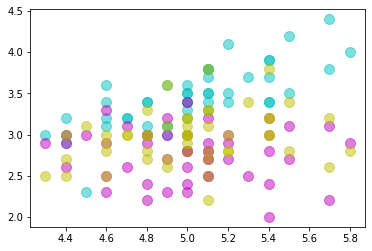

In [93]:
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

#HW 12 : plot scatter 2d ของ iris data โดยทดลองทุกๆ combination เช่น
* dimension1 x dimension2
* dimension2 x dimension1
* ...
* แล้วดูว่า combination ไหนดีที่สุด

In [94]:
len(iris_data['data'][:,0])

150

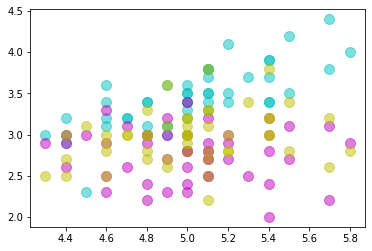

In [95]:
#dimension_0 * dimension_1
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

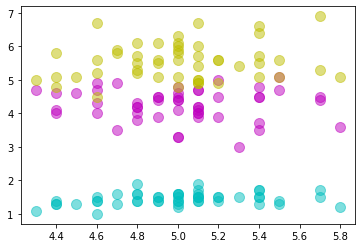

In [96]:
#dimension_0 * dimension_2
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,2],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][50:100,2],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][100:150,2],s=100,c='y',alpha=0.5)

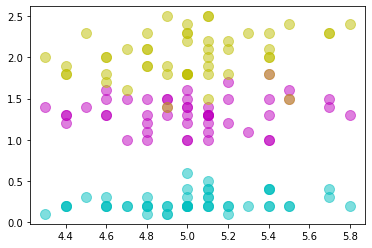

In [97]:
#dimension_0 * dimension_3
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,0],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

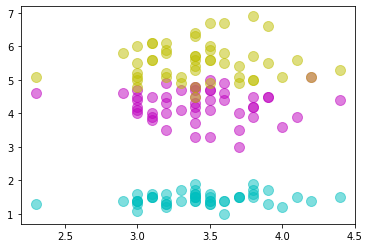

In [98]:
#dimension_1 * dimension_2
plt.scatter(iris_data['data'][:50,1],iris_data['data'][:50,2],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][50:100,2],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][100:150,2],s=100,c='y',alpha=0.5)

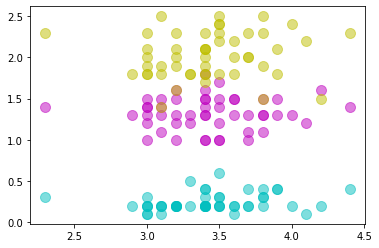

In [99]:
#dimension_1 * dimension_3
plt.scatter(iris_data['data'][:50,1],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,1],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

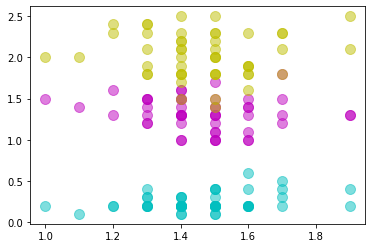

In [100]:
#dimension_2 * dimension_3
plt.scatter(iris_data['data'][:50,2],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][:50,2],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][:50,2],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

#สงสัย

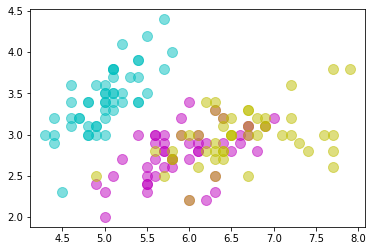

In [101]:
#dimension_0 * dimension_1
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,0],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,0],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

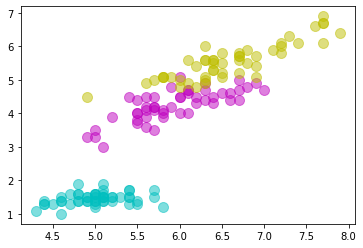

In [102]:
#dimension_0 * dimension_2
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,2],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,0],iris_data['data'][50:100,2],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,0],iris_data['data'][100:150,2],s=100,c='y',alpha=0.5)

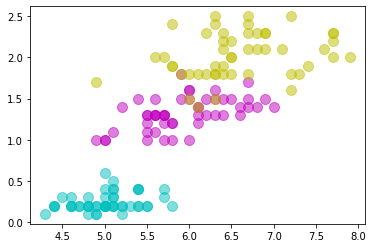

In [103]:
#dimension_0 * dimension_3
plt.scatter(iris_data['data'][:50,0],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,0],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,0],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

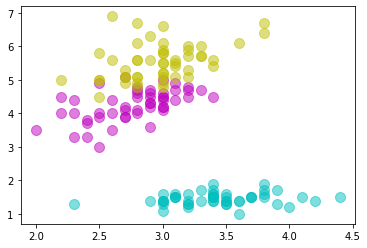

In [104]:
#dimension_1 * dimension_2
plt.scatter(iris_data['data'][:50,1],iris_data['data'][:50,2],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,1],iris_data['data'][50:100,2],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,1],iris_data['data'][100:150,2],s=100,c='y',alpha=0.5)

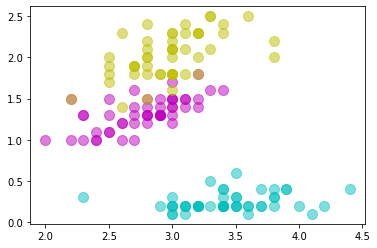

In [105]:
#dimension_1 * dimension_3
plt.scatter(iris_data['data'][:50,1],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,1],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,1],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

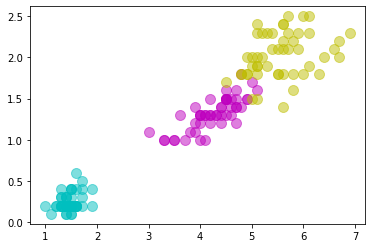

In [106]:
#dimension_2 * dimension_3
plt.scatter(iris_data['data'][:50,2],iris_data['data'][:50,3],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,2],iris_data['data'][50:100,3],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,2],iris_data['data'][100:150,3],s=100,c='y',alpha=0.5)

v

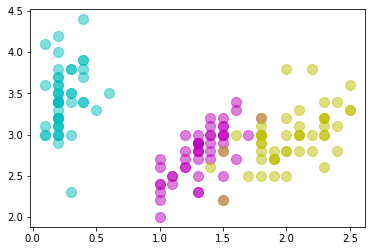

In [107]:
#Disscusในคาบ 
#dimension_3 * dimension_1
plt.scatter(iris_data['data'][:50,3],iris_data['data'][:50,1],s=100,c='c',alpha=0.5)
plt.scatter(iris_data['data'][50:100,3],iris_data['data'][50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(iris_data['data'][100:150,3],iris_data['data'][100:150,1],s=100,c='y',alpha=0.5)

##PCA(Principle Component Analysis)

In [108]:
 import numpy as np
 from sklearn.decomposition import PCA

In [109]:
model_pca = PCA(n_components=2) #define

In [110]:
X_reduce = model_pca.fit_transform(iris_data['data']) #fit (train) >> tranform

In [111]:
iris_data['data'].shape #input >> target ของ iris data

(150, 4)

In [112]:
X_reduce.shape #output

(150, 2)

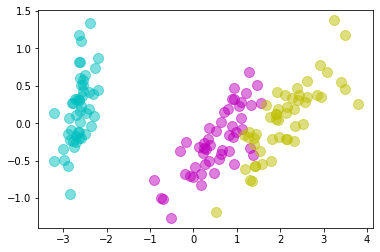

In [113]:
plt.scatter(X_reduce[:50,0],X_reduce[:50,1],s=100,c='c',alpha=0.5)
plt.scatter(X_reduce[50:100,0],X_reduce[50:100,1],s=100,c='m',alpha=0.5)
plt.scatter(X_reduce[100:150,0],X_reduce[100:150,1],s=100,c='y',alpha=0.5)

#Data Integration (combine 2 tables vs coppy some columns from another table)

##Merge two tables
* คำสั่ง .merge()

In [114]:
merged_table = search_click_df.merge(w_restaurant_df,how='left',left_on='business_id',right_on='id')
merged_table

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,298839.0,ปูดองอันยอง Eight,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0g9,0.0,3.836735,12.0,22.0,3.0,0.0,22484.0,1.0,5.0,0.0,Seafood,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,171372.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rteh0,0.0,3.118367,28.0,60.0,43.0,6.0,18373.0,41.0,34.0,37.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,0.0,3.0,NaN,NaN,NaN,1.0
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,16157.0,The Hub Cafe and Eatery,1.0,0.0,Bangkok Metropolitan Region,NaN,w4rw1tu,0.0,4.015184,0.0,348.0,36.0,0.0,27252.0,21.0,13.0,58.0,Cafe,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,89741.0,ซั่งไห่ เสี่ยวหลงเปา,1.0,0.0,Bangkok Metropolitan Region,10900,w4rw8p7,0.0,3.444134,0.0,101.0,21.0,7.0,54847.0,19.0,43.0,32.0,Dim Sum,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,1.0
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,189564.0,Yoshinoya,1.0,0.0,Bangkok Metropolitan Region,10110,w4rw0kc,0.0,2.972672,28.0,32.0,69.0,8.0,13851.0,22.0,66.0,26.0,Japanese,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,278479.0,เสกแจ่วฮ้อน,1.0,0.0,Chaiyaphum,NaN,w6b9cyk,0.0,4.000000,0.0,3.0,2.0,2.0,1599.0,0.0,0.0,0.0,Sukiyaki/Shabu,1.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,321885.0,ก๋วยเตี๋ยวหมูหน่อกะลา,1.0,0.0,Bangkok Metropolitan Region,11120,w4rrppd,0.0,4.000000,0.0,7.0,2.0,1.0,956.0,1.0,0.0,0.0,Noodles,1.0,NaN,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,221035.0,Laemcharoen Seafood,1.0,0.0,Bangkok Metropolitan Region,12130,w4rx9de,0.0,3.830601,23.0,24.0,11.0,8.0,8977.0,7.0,8.0,4.0,Seafood,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,220572.0,เอี่ยวไถ่ สุกี้โบราณ,1.0,0.0,Bangkok Metropolitan Region,11130,w4rqtcb,0.0,3.766129,12.0,153.0,58.0,12.0,37940.0,78.0,0.0,29.0,Sukiyaki/Shabu,3.0,NaN,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## coppy a  column from another table
* คำสั่ง .map()

In [115]:
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
search_click_df

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads,bu_name
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True,ปูดองอันยอง Eight
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True,Yoshinoya
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True,The Hub Cafe and Eatery
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True,ซั่งไห่ เสี่ยวหลงเปา
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True,Yoshinoya
...,...,...,...,...,...,...,...
1048570,05:28.8,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0,8,2.072630e+11,False,เสกแจ่วฮ้อน
1048571,15:28.8,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0,8,6.931413e+10,False,ก๋วยเตี๋ยวหมูหน่อกะลา
1048572,11:49.4,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0,8,3.105162e+10,False,Laemcharoen Seafood
1048573,10:33.7,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0,8,7.848904e+10,False,เอี่ยวไถ่ สุกี้โบราณ


#คำสั่ง pandas ที่เพิ่มให้
* [PD].groupby

In [116]:
groups = search_click_df.groupby('business_id').count()
groups

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
2.0,4,4,4,4,4,4
5.0,2,2,2,2,2,2
6.0,6,6,6,6,6,6
7.0,3,3,3,3,3,3
14.0,5,5,5,5,5,5
...,...,...,...,...,...,...
340060.0,4,4,4,4,4,4
340063.0,1,1,1,1,1,1
340067.0,2,2,2,2,2,2


In [117]:
groups = search_click_df.groupby('business_id').count().sort_values('click_timestamp')
groups

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
122473.0,1,1,1,1,1,1
136485.0,1,1,1,1,1,1
275120.0,1,1,1,1,1,1
136492.0,1,1,1,1,1,1
136498.0,1,1,1,1,1,1
...,...,...,...,...,...,...
150227.0,1377,1377,1377,1377,1377,1377
273486.0,1417,1417,1417,1417,1417,1417
112509.0,2130,2130,2130,2130,2130,2130


In [118]:
search_click_df['bu_name'] = search_click_df['business_id'].map(w_restaurant_df.set_index('id')['name'])
groups['bu_name']  = groups['search_id'].map(w_restaurant_df.set_index('id')['name'])
groups

,click_timestamp,search_id,display_position,time_diff_nanos,ads,bu_name
business_id,,,,,,
122473.0,1,1,1,1,1,NaN
136485.0,1,1,1,1,1,NaN
275120.0,1,1,1,1,1,NaN
136492.0,1,1,1,1,1,NaN
136498.0,1,1,1,1,1,NaN
...,...,...,...,...,...,...
150227.0,1377,1377,1377,1377,1377,โตกิว
273486.0,1417,1417,1417,1417,1417,รสดีเด็ด By นพ
112509.0,2130,2130,2130,2130,2130,กาแฟสดชายโขง


In [119]:
groups = search_click_df.groupby('business_id').count()

Quize 1 : ANS ร้านชื่อ  ร้านเจ๊ไหม ถูกคลิกมากสุดเป็นอันดับ 2 อันดับ 1 ไม่ปรากฎชื่อร้าน

In [120]:
w_restaurant_df[w_restaurant_df['id']== 182530.0]

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
124030,182530,หนานหยวน,1,0,Bangkok Metropolitan Region,10400,w4rw22m,0,4.083893,0.0,37.0,20,1,14200,11,0,10,Chinese,3.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
w_restaurant_df.groupby('city_name').mean()

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,180200.000000,1.000000,0.000000,0.000000,2.600000,0.000000,1.000000,0.400000,0.000000,202.400000,0.800000,0.000000,0.000000,4.000000,NaN,3.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,2.500000,NaN,NaN,NaN,NaN
Aichi-ken,181557.633803,1.000000,0.000000,0.084507,3.710491,0.760563,3.783784,1.323944,0.154930,414.140845,1.056338,0.000000,2.281690,3.056338,NaN,1.641026,0.647059,0.833333,1.000000,0.400000,NaN,0.666667,1.826087,NaN,NaN,NaN,NaN
Akershus,196643.666667,1.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.666667,0.000000,139.000000,0.666667,0.000000,0.333333,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,1.000000,NaN,NaN
Akita-ken,12908.000000,1.000000,0.000000,0.000000,4.500000,0.000000,1.000000,1.000000,0.000000,111.000000,1.000000,0.000000,0.500000,3.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,3.500000,NaN,NaN,NaN,NaN
Al Farwaniyah Governorate,166274.000000,1.000000,0.000000,0.000000,3.666667,0.000000,NaN,1.000000,0.000000,134.666667,0.000000,0.000000,0.666667,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ōita-ken,187412.791045,1.000000,0.000000,0.044776,3.313398,0.000000,1.697674,1.223881,0.059701,322.179104,0.791045,0.000000,1.567164,2.716418,NaN,1.304348,0.750000,1.000000,1.000000,1.000000,NaN,0.363636,1.933333,NaN,1.000000,NaN,NaN
Ōsaka-fu,182106.134483,1.000000,0.000000,0.041379,3.345431,1.262069,6.922619,1.993103,0.268966,586.365517,1.965517,0.000000,3.241379,2.835664,NaN,0.740741,0.462500,0.848485,0.709677,0.322581,NaN,0.540541,2.208333,NaN,1.000000,NaN,NaN
محافظة المحرق,92784.000000,1.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,228.000000,1.000000,0.000000,0.000000,3.000000,NaN,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


#EX 12 เมืองไหนได้ค่าเฉลี่ยของ weighted_average_rating สูงที่สุด

In [122]:
sorted_rating = w_restaurant_df.groupby('city_name').mean().sort_values('weighted_average_rating')
sorted_rating

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
South Carolina,52860.5,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,204.0,0.0,0.0,0.0,3.0,NaN,1.5,1.0,NaN,NaN,1.0,NaN,2.0,1.0,0.0,0.0,NaN,1.0
Bahia,178713.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,163.0,0.0,0.0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Oklahoma,136441.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,369.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region Zealand,115070.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,158.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Région de Kidal,240208.5,2.0,0.5,0.0,0.0,0.0,NaN,0.0,0.0,51.5,0.0,0.0,0.0,NaN,NaN,3.0,0.5,1.0,1.0,1.0,NaN,0.5,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oaxaca,278395.0,1.0,0.0,0.0,5.0,0.0,1.0,1.0,1.0,197.0,0.0,0.0,0.0,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
Wisconsin,107551.0,1.0,0.0,0.0,5.0,0.0,NaN,1.0,0.0,131.0,0.0,0.0,0.0,3.0,NaN,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
Murmanskaya oblast',30394.0,1.0,0.0,0.0,5.0,0.0,NaN,0.0,0.0,38.0,1.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
sorted_rating[sorted_rating['weighted_average_rating']== 5.0]

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Luxor Governorate,256684.000000,1.0,0.0,0.0,5.0,0.0,NaN,1.0,0.000000,76.000000,0.000000,0.0,0.00,3.000000,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
محافظة المحرق,92784.000000,1.0,0.0,0.0,5.0,0.0,1.0,1.0,0.000000,228.000000,1.000000,0.0,0.00,3.000000,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
Lancashire,261949.000000,1.0,0.0,1.0,5.0,0.0,NaN,1.0,0.000000,111.000000,0.000000,0.0,1.00,2.000000,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
Kepulauan Riau,145430.500000,1.0,0.0,1.0,5.0,0.0,NaN,1.0,0.000000,173.000000,1.000000,0.0,1.00,2.000000,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.5,3.5,NaN,NaN,NaN,NaN
Western Cape,82327.000000,1.0,0.0,0.0,5.0,0.0,NaN,1.0,0.000000,100.000000,0.000000,0.0,2.00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appenzell Innerrhoden,197434.000000,1.0,0.0,0.0,5.0,0.0,1.5,1.0,0.000000,299.500000,0.000000,0.0,1.50,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Borno,276020.000000,2.0,0.0,0.0,5.0,0.0,2.0,1.0,0.000000,309.000000,0.000000,0.0,19.00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
Bremen,214714.250000,1.0,0.0,0.0,5.0,0.0,NaN,1.0,0.000000,104.750000,0.000000,0.0,0.25,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buckinghamshire,28701.000000,1.0,0.0,0.0,5.0,0.0,NaN,0.0,0.000000,24.000000,0.000000,0.0,0.00,4.000000,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN


In [124]:
sorted_rating[sorted_rating['weighted_average_rating']> 4.5].sort_values('number_of_reviews')

,id,domain_id,closed,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
city_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Murmanskaya oblast',30394.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,0.0,0.000000,38.000000,1.000000,0.0,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buckinghamshire,28701.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,0.0,0.000000,24.000000,0.000000,0.0,0.000000,4.000000,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN
Cairo Governorate,277711.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,1.0,0.000000,169.000000,0.000000,0.0,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,107551.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,1.0,0.000000,131.000000,0.000000,0.0,0.000000,3.000000,NaN,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
Oaxaca,278395.000000,1.0,0.0,0.000000,5.000000,0.0,1.0,1.0,1.000000,197.000000,0.000000,0.0,0.000000,1.000000,NaN,3.0,0.0,1.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
Guangxi Zhuangzuzizhiqu,112065.333333,1.0,0.0,0.000000,5.000000,0.0,NaN,1.0,0.333333,75.333333,0.333333,0.0,0.000000,1.333333,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,1.5,NaN,NaN,NaN,NaN
Vorarlberg,224505.000000,1.0,0.0,0.000000,5.000000,0.0,1.0,1.0,0.000000,154.000000,0.000000,0.0,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vladimirskaya oblast',311200.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,1.0,0.000000,87.000000,1.000000,0.0,1.000000,3.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Primorskiy kray,157938.000000,1.0,0.0,0.000000,5.000000,0.0,NaN,1.0,0.000000,38.000000,0.000000,0.0,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Save to csv file
input คือ = ชื่อตารางที่เราต้องการเซฟไปใช้ที่อื่น

In [125]:
merged_table.to_csv('search_click_extracted_time.csv')